In [1]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 60

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng

### 評分標準

#### 14.11~14.22 (共6小題，每小題10%)  
- 3% Condition1_Normal Distribution ：H0H1 1%, 檢定過程1%, reject H0 or not 0.5%, conclusion 0.5% (畫圖則圖2%, conclusion1%) 
- 3% Condition2_Equal Variances &ensp; &ensp; ：H0H1 1%, 檢定過程1%, reject H0 or not 0.5%, conclusion 0.5%
- 1% Condition3_Independence  
- 3% ANOVA test &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; ：H0H1 1%, 檢定過程1%, reject H0 or not 0.5%, conclusion 0.5%
- 若H0H1中有用到 $\mu_1 , \mu_2 , \mu_3 , \mu_4  $ 等，但未註記1,2,3,4為何，該小題扣0.5% 

#### 14.57(20%)
- (a)(b)(c)各6%，H0H1 1%, 計算 3%, reject H0 1%, conclusion 1%

#### 14.63(20%)
- (a)10%，標準同14.11~14.22
- (b)(c)各5%，H0H1 1%, 計算 2%, reject H0 1%, conclusion 1%

### 14.11 (10%)

Let treatment "Less than HS", "HS grad", "Some college", "College grad" be treatment1, treatment2, treatment3, treatment4 respectively.  
Alpha = 0.05 for all hypthesis tests.

In [2]:
data11 = pd.read_excel("Xr14-11.xlsx")
print('Head of dataset:')
display(data11.head())

print("Tail of dataset:")
display(data11.tail())

Head of dataset:


,Less than HS,HS grad,Some college,College grad
0,193.0,189.0,211,269.0
1,231.0,182.0,183,243.0
2,195.0,209.0,203,187.0
3,189.0,197.0,214,170.0
4,200.0,215.0,150,272.0


Tail of dataset:


,Less than HS,HS grad,Some college,College grad
81,NaN,NaN,260,NaN
82,NaN,NaN,249,NaN
83,NaN,NaN,203,NaN
84,NaN,NaN,239,NaN
85,NaN,NaN,185,NaN


In [3]:
cols = list(data11.columns.values)
cols

['Less than HS', 'HS grad', 'Some college', 'College grad']

In [4]:
unit = "score"
treatments = ['LessHS', 'HS', 'SomeCollege', 'College']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df11 = data11.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], \
                                cols[2]: unit+'_'+treatments[2], cols[3]: unit+'_'+treatments[3]})

#需要一個ID欄位
df11["id"] = df11.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df11w = pd.wide_to_long(df11, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
df11w = df11w[~np.isnan(df11w[unit])]

#移除id行
df = df11w.drop(columns=['id'])

In [5]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

score                                                          
            count        mean        std    min    25%    50%    75%    max
factor                                                                     
College      79.0  232.670886  32.860514  136.0  210.0  241.0  253.0  309.0
HS           73.0  207.780822  29.344811  143.0  187.0  210.0  222.0  269.0
LessHS       41.0  196.829268  30.233179  139.0  175.0  194.0  211.0  278.0
SomeCollege  86.0  223.383721  34.575125  150.0  199.5  223.0  249.0  304.0

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [6]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

LessHS          : Statistics=0.9778, p=0.5932
HS              : Statistics=0.9826, p=0.4125
SomeCollege     : Statistics=0.9893, p=0.7096
College         : Statistics=0.9813, p=0.3014


Since each p-value above is larger than 0.05, for each factor, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments are Normal Distribution.

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$ <br>
H1: At least two variances are different

In [7]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=2.4244513470943465, pvalue=0.4890992428018036)

Since the p-value above is larger than 0.05, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments have Equal Variances.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ <br>
$H_1$: At least two means differ

In [8]:
results = smf.ols( unit + ' ~ C(factor)', data=df).fit()
#results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),45495.692333,3.0,14.663985,6.927991e-09
Residual,284400.078276,275.0,NaN,NaN


Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean scores is different from the others.

### 14.17 (20%) (每小題10%)

Let treatment "Group1", "Group2", "Group3" be treatment1, treatment2, treatment3 respectively.  
Alpha = 0.05 for all hypthesis tests.

In [9]:
data17 = pd.read_excel("Xr14-17.xlsx")

print('Head of dataset:')
display(data17.head())

print("Tail of dataset:")
display(data17.tail())

Head of dataset:


,Size-Group 1,Size-Group 2,Size-Group 3,Nicotine-Group 1,Nicotine-Group 2,Nicotine-Group 3
0,15.43,13.50,11.17,18.34,18.17,4.87
1,37.34,25.73,10.90,17.26,13.10,13.64
2,25.98,22.90,21.09,11.26,15.29,12.56
3,20.44,33.02,10.52,20.09,14.44,10.66
4,18.76,34.46,22.65,13.71,15.35,7.72


Tail of dataset:


,Size-Group 1,Size-Group 2,Size-Group 3,Nicotine-Group 1,Nicotine-Group 2,Nicotine-Group 3
45,27.96,25.60,15.21,17.83,14.46,11.37
46,21.10,12.70,27.89,19.75,14.49,9.02
47,27.92,21.56,24.56,17.42,13.91,11.97
48,32.14,24.61,28.16,15.04,12.07,11.05
49,39.55,27.52,19.78,14.94,14.06,11.20


In [10]:
#根據a,b兩小題，分成兩份data

data17_a = data17[list(data17.columns)[:3]]
data17_b = data17[list(data17.columns)[3:]]

### 14.17(a)

In [11]:
cols = list(data17_a.columns.values)
cols

['Size-Group 1', 'Size-Group 2', 'Size-Group 3']

In [12]:
unit = "Size"
treatments = ['Group1', 'Group2', 'Group3']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df17_a = data17_a.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], cols[2]: unit+'_'+treatments[2]})

#需要一個ID欄位
df17_a["id"] = df17_a.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df17_aw = pd.wide_to_long(df17_a, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()

#移除id行
df = df17_aw.drop(columns=['id'])

In [13]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

Size                                                         
       count     mean       std    min      25%    50%     75%    max
factor                                                               
Group1  50.0  24.9680  6.944855  13.49  19.5775  25.35  29.465  39.81
Group2  50.0  21.6474  7.385159   4.91  15.3500  22.89  26.230  35.39
Group3  50.0  17.8446  5.818502   2.64  14.2100  16.88  21.600  29.16

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [14]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

Group1          : Statistics=0.9699, p=0.2291
Group2          : Statistics=0.9785, p=0.4925
Group3          : Statistics=0.9792, p=0.5184


Since each p-value above is larger than 0.05, for each factor, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments are Normal Distribution.

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2  $ <br>
H1: At least two variances are different

In [15]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=2.859391024454145, pvalue=0.23938179997915682)

Since the p-value above is larger than 0.05, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments have Equal Variances.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3  $ <br>
$H_1$: At least two means differ

In [16]:
results = smf.ols( unit + ' ~ C(factor)', data=df).fit()
#results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),1270.508329,2.0,13.948698,0.000003
Residual,6694.700804,147.0,NaN,NaN


Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean size is different from the others.

### 14.17(b)

In [17]:
cols = list(data17_b.columns.values)
cols

['Nicotine-Group 1', 'Nicotine-Group 2', 'Nicotine-Group 3']

In [18]:
unit = "Nicotine"
treatments = ['Group1', 'Group2', 'Group3']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df17_b = data17_b.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], cols[2]: unit+'_'+treatments[2]})

#需要一個ID欄位
df17_b["id"] = df17_b.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df17_bw = pd.wide_to_long(df17_b, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()

#移除id行
df = df17_bw.drop(columns=['id'])

In [19]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

Nicotine                                                           
          count     mean       std    min      25%     50%      75%    max
factor                                                                    
Group1     50.0  15.5234  1.927604  11.26  14.2125  15.705  16.5575  20.09
Group2     50.0  13.3854  1.895423   4.87  12.7650  13.405  14.4825  18.17
Group3     50.0  10.0764  1.955812   4.87   9.0400  10.630  11.3525  13.64

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [20]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

Group1          : Statistics=0.9879, p=0.8849
Group2          : Statistics=0.8689, p=0.0001
Group3          : Statistics=0.9455, p=0.0224


The p-value of Group1 is greater than 0.05, we dont reject the null hypothesis for Group1 at a significance level of 0.05.  
However, the p-values of Group2 and Group3 are less than 0.05, we reject the null hypothesis for Group2 amd Group3 at a significance level of 0.05.  
Thus, the data doesnt satisfy the condition that all treatsments are Normal Distribution.  
We can double check the result by applying QQplot.

#### Condition1-2: 使用QQplot檢查分布是否為常態  

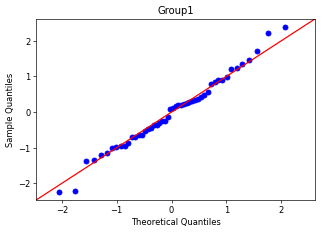

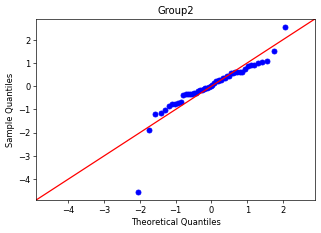

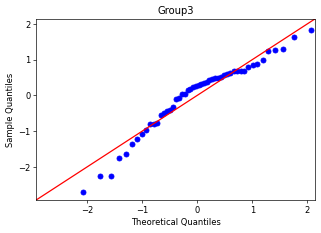

In [21]:
for i in range(len(treatments)):
    fig = sm.qqplot(df[unit][df['factor'] == treatments[i]], stats.norm, fit=True, line='45')
    plt.title(treatments[i])
plt.show()

According to the QQplots above, Group2 and Group3 are close to normal distribution.

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2  $ <br>
H1: At least two variances are different

In [22]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=0.04781076857982709, pvalue=0.9763780860936427)

Since the p-value above is larger than 0.05, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments have Equal Variances.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3  $ <br>
$H_1$: At least two means differ

In [23]:
results = smf.ols( unit + ' ~ C(factor)', data=df).fit()
#results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),753.172233,2.0,101.473928,2.058633e-28
Residual,545.540716,147.0,NaN,NaN


Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean size is different from the others.  

### 14.22 (30%) (每小題10%)

Let treatment "US", "Canada", "UK" be treatment1, treatment2, treatment3 respectively.  
Alpha = 0.05 for all hypthesis tests.

In [24]:
data22 = pd.read_excel("Xr14-22.xlsx")
print('Head of dataset:')
display(data22.head())

print("Tail of dataset:")
display(data22.tail())

Head of dataset:


,US Reading,Canada Reading,UK Reading,US Math,Canada Math,UK Math,US Science,Canada Science,UK Science
0,500,552.0,509.0,494,530.0,505.0,488,526.0,518.0
1,481,468.0,452.0,456,562.0,527.0,501,547.0,519.0
2,503,494.0,504.0,485,536.0,515.0,492,577.0,515.0
3,488,505.0,489.0,511,523.0,559.0,486,536.0,599.0
4,468,524.0,462.0,499,597.0,445.0,518,500.0,523.0


Tail of dataset:


,US Reading,Canada Reading,UK Reading,US Math,Canada Math,UK Math,US Science,Canada Science,UK Science
619,518,NaN,NaN,489,NaN,NaN,527,NaN,NaN
620,464,NaN,NaN,492,NaN,NaN,497,NaN,NaN
621,500,NaN,NaN,485,NaN,NaN,513,NaN,NaN
622,498,NaN,NaN,500,NaN,NaN,503,NaN,NaN
623,482,NaN,NaN,463,NaN,NaN,483,NaN,NaN


In [25]:
#依照不同科目，分成三份data

data22_a = data22[list(data22.columns)[:3]]
data22_b = data22[list(data22.columns)[3:6]]
data22_c = data22[list(data22.columns)[6:]]

### 14.22(a)

In [26]:
cols = list(data22_a.columns.values)
cols

['US Reading', 'Canada Reading', 'UK Reading']

In [27]:
unit = "Reading"
treatments = ['US', 'Canada', 'UK']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df22_a = data22_a.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], cols[2]: unit+'_'+treatments[2]})

#需要一個ID欄位
df22_a["id"] = df22_a.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df22_aw = pd.wide_to_long(df22_a, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
df22_aw = df22_aw[~np.isnan(df22_aw[unit])]

#移除id行
df = df22_aw.drop(columns=['id'])

In [28]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

Reading                                                          
         count        mean        std    min    25%    50%    75%    max
factor                                                                  
Canada   409.0  524.386308  26.198103  452.0  505.0  523.0  542.0  596.0
UK       498.0  493.785141  24.663286  413.0  479.0  497.0  510.0  572.0
US       624.0  500.272436  24.733757  406.0  484.0  500.0  517.0  567.0

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [29]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

US              : Statistics=0.9968, p=0.2499
Canada          : Statistics=0.9956, p=0.3163
UK              : Statistics=0.9887, p=0.0007


The p-values of US and Canada are greater than 0.05, we dont reject the null hypothesis for US and Canada at a significance level of 0.05.  
However, p-value of UK is less than 0.05, we reject the null hypothesis for UK at a significance level of 0.05.  
Thus, the data doesnt satisfy the condition that all treatsments are Normal Distribution.  
We can double check the result by applying QQplot.

#### Condition1-2: 使用QQplot檢查分布是否為常態  

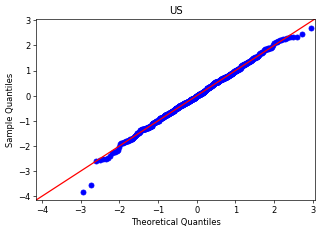

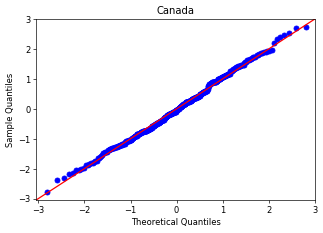

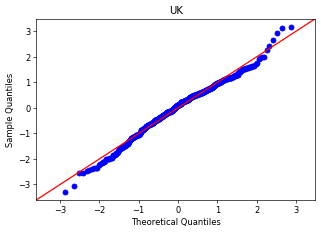

In [30]:
for i in range(len(treatments)):
    fig = sm.qqplot(df[unit][df['factor'] == treatments[i]], stats.norm, fit=True, line='45')
    plt.title(treatments[i])
plt.show()

Since Shapiro Test might be biased when the sample size is large, we double check the distribution using QQplot.  
According to the QQplots above, all of them seem like normal distribution.  
Thus, the data satisfies the condition that all treatsments are Normal Distribution.  

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2  $ <br>
H1: At least two variances are different

In [31]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=2.1065784569498787, pvalue=0.3487886148209796)

Since the p-value above is larger than 0.05, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments have Equal Variances.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3  $ <br>
$H_1$: At least two means differ

In [32]:
results = smf.ols( unit + ' ~ C(factor)', data=df).fit()
#results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),230055.473983,2.0,182.427052,8.969061e-72
Residual,963466.659263,1528.0,NaN,NaN


Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean scores is different from the others.

### 14.22(b)

In [33]:
cols = list(data22_b.columns.values)
cols

['US Math', 'Canada Math', 'UK Math']

In [34]:
unit = "Math"
treatments = ['US', 'Canada', 'UK']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df22_b = data22_b.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], cols[2]: unit+'_'+treatments[2]})

#需要一個ID欄位
df22_b["id"] = df22_b.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df22_bw = pd.wide_to_long(df22_b, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
df22_bw = df22_bw[~np.isnan(df22_bw[unit])]

#移除id行
df = df22_bw.drop(columns=['id'])

In [35]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

Math                                                          
        count        mean        std    min    25%    50%    75%    max
factor                                                                 
Canada  409.0  527.474328  25.573614  462.0  510.0  527.0  545.0  597.0
UK      498.0  492.042169  25.461539  418.0  476.0  492.0  508.0  559.0
US      624.0  486.631410  24.888877  408.0  470.0  486.0  503.0  568.0

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [36]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

US              : Statistics=0.9987, p=0.9339
Canada          : Statistics=0.9968, p=0.6082
UK              : Statistics=0.9965, p=0.3462


Since each p-value above is larger than 0.05, for each factor, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments are Normal Distribution.

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2  $ <br>
H1: At least two variances are different

In [37]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=0.458251322927984, pvalue=0.7952285976363944)

Since the p-value above is larger than 0.05, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments have Equal Variances.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3  $ <br>
$H_1$: At least two means differ

In [38]:
results = smf.ols( unit + ' ~ C(factor)', data=df).fit()
#results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),451041.661801,2.0,353.447092,6.885271e-127
Residual,974957.319257,1528.0,NaN,NaN


Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean scores is different from the others.  

### 14.22(c)

In [39]:
cols = list(data22_c.columns.values)
cols

['US Science', 'Canada Science', 'UK Science']

In [40]:
unit = "Science"
treatments = ['US', 'Canada', 'UK']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df22_c = data22_c.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], cols[2]: unit+'_'+treatments[2]})

#需要一個ID欄位
df22_c["id"] = df22_c.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df22_cw = pd.wide_to_long(df22_c, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
df22_cw = df22_cw[~np.isnan(df22_cw[unit])]

#移除id行
df = df22_cw.drop(columns=['id'])

In [41]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

Science                                                           
         count        mean        std    min     25%    50%    75%    max
factor                                                                   
Canada   409.0  528.855746  29.702549  446.0  510.00  530.0  548.0  612.0
UK       498.0  513.889558  26.757835  444.0  495.25  514.0  532.0  608.0
US       624.0  502.022436  25.676644  428.0  485.00  502.0  517.0  605.0

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [42]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

US              : Statistics=0.9937, p=0.0106
Canada          : Statistics=0.9970, p=0.6551
UK              : Statistics=0.9944, p=0.0670


The p-values of UK and Canada are greater than 0.05, we dont reject the null hypothesis for UK and Canada at a significance level of 0.05.  
However, p-value of US is less than 0.05, we reject the null hypothesis for US at a significance level of 0.05.  
Thus, the data doesnt satisfy the condition that all treatsments are Normal Distribution.  
We can double check the result by applying QQplot.

#### Condition1-2: 使用QQplot檢查分布是否為常態  

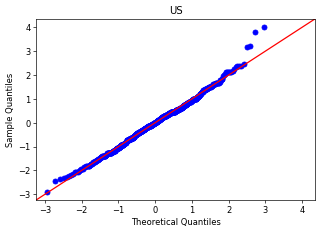

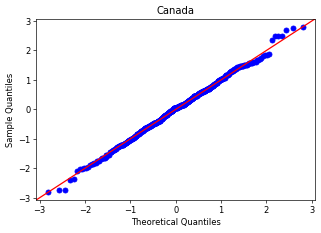

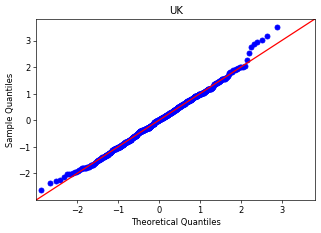

In [43]:
for i in range(len(treatments)):
    fig = sm.qqplot(df[unit][df['factor'] == treatments[i]], stats.norm, fit=True, line='45')
    plt.title(treatments[i])
plt.show()

Since Shapiro Test might be biased when the sample size is large, we double check the distribution using QQplot.  
According to the QQplots above, all of them seem like normal distribution.  
Thus, the data satisfies the condition that all treatsments are Normal Distribution.  

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2  $ <br>
H1: At least two variances are different

In [44]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=10.938592097299118, pvalue=0.004214197704239352)

Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, the data doesnt satisfy the condition that all treatsments have Equal Variances, which means the result of ANOVA test might be doubtful.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3  $ <br>
$H_1$: At least two means differ

In [45]:
results = smf.ols( unit + ' ~ C(factor)', data=df).fit()
#results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),1.784109e+05,2.0,120.995739,1.660598e-49
Residual,1.126535e+06,1528.0,NaN,NaN


Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean scores is different from the others.  
However, the data doesnt satisfy the condition that all treatsments have Equal Variances, which means the result of ANOVA test might be doubtful.

### 14.57 (20%)

In [67]:
#題目給的資訊
k = 3
MSE = 700

data = [['X1',128.7, 10], ['X2',101.4, 10],['X3',133.7, 10]]
df = pd.DataFrame(data,columns = ['treatment', 'mean', 'sample size'])
df

,treatment,mean,sample size
0,X1,128.7,10
1,X2,101.4,10
2,X3,133.7,10


### 14.57(a)(b)
$H_0: \mu_i = \mu_j $  , where  i, j in [1, 3] <br> 
$H_1$: The two means differ

In [70]:
# a function for applying LSD and Bonferroni

def LSD(df, k):
    v = df['sample size'].sum() - k

    #LSD
    alpha = 0.05
    t = stats.t.ppf(1-alpha/2, v)

    #Bonferroni
    C = k*(k-1)/2
    alphaC = 0.05/C
    tb =  stats.t.ppf(1-alphaC/2, v)
    
    summary = []
    for i in range(k):
        for j in range((i+1), k):
            difference = abs( df['mean'][i] - df['mean'][j] )

            LSD = t * ( MSE * (1/df['sample size'][i] + 1/df['sample size'][j])) ** (1/2) 
            
            rejectLSD = bool((difference - LSD)>0)
            print(difference, LSD, rejectLSD)

            BA = tb * ( MSE * (1/df['sample size'][i] + 1/df['sample size'][j])) ** (1/2) 
            rejectBA = bool((difference - BA)>0)

            summary.append([df['treatment'][i], df['treatment'][j], df['mean'][i], df['mean'][j], difference, \
                            LSD, rejectLSD, BA, rejectBA ])
    df2 = pd.DataFrame(summary, columns = ['treatment1','treatment2', 'mean1', 'mean2', 'difference', 'LSD', 'LSD rejectH0', 'BA', 'BA rejectH0'])
    
    return df2

In [71]:
LSD(df,k)

27.299999999999983 24.277586073791696 True
5.0 24.277586073791696 False
32.29999999999998 24.277586073791696 True


,treatment1,treatment2,mean1,mean2,difference,LSD,LSD rejectH0,BA,BA rejectH0
0,X1,X2,128.7,101.4,27.3,24.277586,True,30.2011,False
1,X1,X3,128.7,133.7,5.0,24.277586,False,30.2011,False
2,X2,X3,101.4,133.7,32.3,24.277586,True,30.2011,True


(a)  
According to the table above, the pair of (X1,X2) and (X2,X3) reject H0 at a significance level = 0.05 using LSD method.  
Thus, we can conclude that X2 has a different mean.

(b)  
According to the table above, the pair of (X2,X3) reject H0 at a significance level = 0.05 using Bonferroni method.  
Thus, we can conclude that X2 and X3 have different means.

### 14.57(c)
$H_0: \mu_i = \mu_j $  , where  i, j in [1, 3] <br> 
$H_1$: The two means differ

In [72]:
#quantile function
v = df['sample size'].sum() - k
q = statsmodels.stats.libqsturng.qsturng(0.95, k, v)
omega = q * ((MSE/10)**(1/2))
omega

29.331374947080647

#### Multiple Comparison

In [73]:
summary = []
for i in range(k):
    for j in range((i+1), k):
        difference = abs( df['mean'][i] - df['mean'][j] )
        
        omega = q * ((MSE/10)**(1/2))
        reject = bool((difference - omega)>0)

        summary.append([df['treatment'][i], df['treatment'][j], df['mean'][i], df['mean'][j], difference, omega, reject])
df2 = pd.DataFrame(summary, columns = ['treatment1','treatment2', 'mean1', 'mean2', 'difference', 'omega', 'rejectH0'])
df2

,treatment1,treatment2,mean1,mean2,difference,omega,rejectH0
0,X1,X2,128.7,101.4,27.3,29.331375,False
1,X1,X3,128.7,133.7,5.0,29.331375,False
2,X2,X3,101.4,133.7,32.3,29.331375,True


According to the table above, the pair of (X2,X3) reject H0 at a significance level = 0.05.  
Thus, we can conclude that X2 and X3 have different means.

### 14.63 (20%)

Let treatment "Flare A", "Flare B", "Flare C", "Flare D" be treatment1, treatment2, treatment3, treatment4 respectively.  
Alpha = 0.05 for all hypthesis tests.

In [74]:
data63 = pd.read_excel("Xr14-63.xlsx")
print('Head of dataset:')
display(data63.head())

print("Tail of dataset:")
display(data63.tail())

Head of dataset:


,Flare A,Flare B,Flare C,Flare D
0,51,45,58,60
1,66,61,71,35
2,76,48,64,59
3,60,57,59,50
4,51,49,67,55


Tail of dataset:


,Flare A,Flare B,Flare C,Flare D
5,58,72,60,48
6,59,55,60,54
7,71,58,60,41
8,71,65,64,53
9,53,63,55,63


In [75]:
cols = list(data63.columns.values)
cols

['Flare A', 'Flare B', 'Flare C', 'Flare D']

In [76]:
unit = "Flare"
treatments = ['A', 'B', 'C', 'D']

#wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df63 = data63.rename(columns = {cols[0]: unit+'_'+treatments[0], cols[1]: unit+'_'+treatments[1], \
                                cols[2]: unit+'_'+treatments[2], cols[3]: unit+'_'+treatments[3]})

#需要一個ID欄位
df63["id"] = df63.index

#呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df63w = pd.wide_to_long(df63, [unit], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
df63w = df63w[~np.isnan(df63w[unit])]

#移除id行
df = df63w.drop(columns=['id'])

In [77]:
#看看不同factor下的summary statistics
df.groupby(['factor']).describe()

Flare                                                
       count  mean       std   min    25%   50%    75%   max
factor                                                      
A       10.0  61.6  8.971560  51.0  54.25  59.5  69.75  76.0
B       10.0  57.3  8.393781  45.0  50.50  57.5  62.50  72.0
C       10.0  61.8  4.709329  55.0  59.25  60.0  64.00  71.0
D       10.0  51.8  8.676917  35.0  48.50  53.5  58.00  63.0

### 14.63(a)

#### Condition1: 使用Shapiro Test檢查分布是否為常態  
H0: Normal distribution  
H1: Not Normal distribution  

In [78]:
for i in range(len(treatments)):
    stat, p = stats.shapiro(df[unit][df['factor'] == treatments[i]])
    print('%-15s : Statistics=%.4f, p=%.4f' % (treatments[i], stat, p))

A               : Statistics=0.9191, p=0.3495
B               : Statistics=0.9747, p=0.9305
C               : Statistics=0.9408, p=0.5614
D               : Statistics=0.9466, p=0.6286


Since each p-value above is larger than 0.05, for each factor, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments are Normal Distribution.

#### Condition2: Bartlett's Tests for Equal Variance  
H0: $\sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$ <br>
H1: At least two variances are different

In [79]:
stats.bartlett(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

BartlettResult(statistic=3.88488856825932, pvalue=0.27416536871965236)

Since the p-value above is larger than 0.05, we can not reject the null hypothesis at a significance level of 0.05.  
Thus, the data satisfies the condition that all treatsments have Equal Variances.

#### Condition3: According to the problem discription, the observations are independent.

#### Apply ANOVA Test for mean equality  
$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ <br>
$H_1$: At least two means differ

In [80]:
stats.f_oneway(*(df[unit][df['factor'] == treatments[i]] for i in range(len(treatments))))

F_onewayResult(statistic=3.556872567875833, pvalue=0.023642279407972023)

Since the p-value above is less than 0.05, we reject the null hypothesis at a significance level of 0.05.  
Thus, we conclude that at least one of the mean time is different from the others.

### 14.63(b)
$H_0: \mu_i = \mu_j $  , where  i, j in [1, 4] <br> 
$H_1$: The two means differ

In [81]:
des = pd.DataFrame((group.describe().rename(columns={'score':name}).squeeze()
                         for name, group in df.groupby('factor')), index=['A','B','C','D'])

In [82]:
des

,count,mean,std,min,25%,50%,75%,max
A,10.0,61.6,8.971560,51.0,54.25,59.5,69.75,76.0
B,10.0,57.3,8.393781,45.0,50.50,57.5,62.50,72.0
C,10.0,61.8,4.709329,55.0,59.25,60.0,64.00,71.0
D,10.0,51.8,8.676917,35.0,48.50,53.5,58.00,63.0


In [83]:
k = 4

SSE = (df.groupby(['factor']).var() * (10-1)).sum()      

data = []
for i in range(k):
    data.append([des.index[i], des['mean'][i], des['count'][i]])
df2 = pd.DataFrame(data,columns = ['treatment', 'mean', 'sample size'])
df2

,treatment,mean,sample size
0,A,61.6,10.0
1,B,57.3,10.0
2,C,61.8,10.0
3,D,51.8,10.0


In [84]:
LSD(df2,k)

4.300000000000004 23.99673183485211 False
0.19999999999999574 23.99673183485211 False
9.800000000000004 23.99673183485211 False
4.5 23.99673183485211 False
5.5 23.99673183485211 False
10.0 23.99673183485211 False


,treatment1,treatment2,mean1,mean2,difference,LSD,LSD rejectH0,BA,BA rejectH0
0,A,B,61.6,57.3,4.3,23.996732,False,33.035058,False
1,A,C,61.6,61.8,0.2,23.996732,False,33.035058,False
2,A,D,61.6,51.8,9.8,23.996732,False,33.035058,False
3,B,C,57.3,61.8,4.5,23.996732,False,33.035058,False
4,B,D,57.3,51.8,5.5,23.996732,False,33.035058,False
5,C,D,61.8,51.8,10.0,23.996732,False,33.035058,False


According to the table above, the pair of flare C and flare D reject H0 at a significance level = 0.05/6 using Bonferroni Method.  
Thus, we can conclude that flare C and D have different means and meanC is larger than meanD.

### 14.63(c)
$H_0: \mu_i = \mu_j $  , where  i, j in [1, 4] <br> 
$H_1$: The two means differ

In [62]:
#quantile function
v = df2['sample size'].sum() - k
q = statsmodels.stats.libqsturng.qsturng(0.95, k, v)
omega = q * ((MSE/10)**(1/2))
omega

31.86701487355894

#### Multiple Comparison

In [63]:
mc = smm.MultiComparison(df['Flare'], df['factor'])
print(mc.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -4.3 0.6062 -13.7918  5.1918  False
     A      C      0.2    0.9  -9.2918  9.6918  False
     A      D     -9.8 0.0408 -19.2918 -0.3082   True
     B      C      4.5 0.5748  -4.9918 13.9918  False
     B      D     -5.5 0.4147 -14.9918  3.9918  False
     C      D    -10.0 0.0357 -19.4918 -0.5082   True
-----------------------------------------------------


According to the table above, the pair of flare (A,D) and flare (C,D) reject H0 at a significance level = 0.05.  
Thus, we can conclude that those two pairs have different means.